In [1]:
# Setup

%matplotlib inline
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

# Nice big plots
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

np.random.seed(42)

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original", data_home=os.path.expanduser("~/Coding Stuff/Python/handson-ml/datasets"))
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

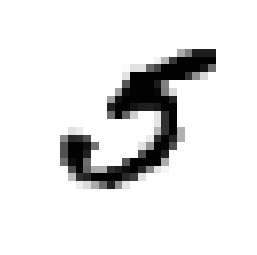

In [5]:
# Let's look at one of the numbers
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28) # make into 28x28 array
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
# Looks like a 5, let's check the label
y[36000]

5.0

In [7]:
# Time to split our data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Next, shuffle the training set to make sure that cross-validation folds will be similar
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

In [8]:
# Let's first only try to ID one digit. This is an example of a binary classifier.
# Ours will determine if a digit is a 5 or not a 5.

# target vectors
y_train_5 = (y_train == 5) #true for all 5s, false otherwise
y_test_5 = (y_test == 5)

# Time to pick a classifier. We'll start with the Stochastic Gradient Descent (SGD) classifier.
# This classifier can handle very large datasets efficiently since SGD deals with training instances
# independently, one at a time (which also makes SGD good at online learning using partial_fit).
# The "Stochastic" in the name refers to how the model relies on randomness during training.

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) # we set the random_state variable for reproducible results
sgd_clf.fit(X_train, y_train_5)

# Let's try it out
sgd_clf.predict([some_digit]) # should be true since we know it's a 5

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ True])

# Performance Measures
## Measuring accuracy with Cross-Validation

In [9]:
# Here's code to implement our own cross-validation

"""
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_ind, test_ind in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_ind]
    y_train_folds = y_train_5[train_ind]
    X_test_fold = X_train[test_ind]
    y_test_fold = y_train_5[test_ind]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
"""

# This code performs stratified sampling to produce folds that contain a representative ratio of each class
# Each iteration, we clone our classifier, train it on the training fold, predict on test fold, and evaluate
# the results

'\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.base import clone\n\nskfolds = StratifiedKFold(n_splits=3, random_state=42)\n\nfor train_ind, test_ind in skfolds.split(X_train, y_train_5):\n    clone_clf = clone(sgd_clf)\n    X_train_folds = X_train[train_ind]\n    y_train_folds = y_train_5[train_ind]\n    X_test_fold = X_train[test_ind]\n    y_test_fold = y_train_5[test_ind]\n    \n    clone_clf.fit(X_train_folds, y_train_folds)\n    y_pred = clone_clf.predict(X_test_fold)\n    n_correct = sum(y_pred == y_test_fold)\n    print(n_correct / len(y_pred))\n'

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/s

array([0.9502 , 0.96565, 0.96495])

In [11]:
# > 95% accuracy seems a bit too good to be true... let's check with a terrible classifier

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
# Let's get the accuracy of our awful classifier
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.909  , 0.90715, 0.9128 ])

In [12]:
# > 90% accurate and this classifier does nothing. Basically, since 10% of images are 5s, saying that a particular
# image isn't a 5 will be right 90% of the time (as we can see)
# This shows us why accuracy doesn't really help as a metric for classifiers

## Confusion Matrix

In [13]:
# This is a better way of evaluating the performance of a classifier. General idea is to count the # of times
# instances of class A are classified as class B. To see how many times the 5 is confused for a 3, you'd check the 
# 5th row 3rd column of the matrix

# To compute, you'd need a set of predictions to compare to the actual targets. We won't use the test set for this
# though.

# The rows represent actual classes, and the columns represent predicted classes. The first row considers non-5
# images where 53,272 were correctly ID'd (true negative) and the last 1,307 were not (false positive).
# The second row is the 5 images where 1,077 were wrongly not classified (false negative)
# and the remaining 4,344 were correctly classified (true positive). A perfect classifier would have 0s on the
# diagonal that ranges from bottom left to top right

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/s

array([[53272,  1307],
       [ 1077,  4344]])

In [14]:
# An interesting metric to look at is the accuracy of positive predictions (precision of the classifier)
# This is given by the True Positives (TP) /(TP + FP) where FP is false positives

# Along with precision, the sensitivity (aka recall or true positive rate) is important to know.
# This is given by TP / TP + FN where FN is the number of false negative

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7687135020350381

In [15]:
recall_score(y_train_5, y_train_pred)

0.801328168234643

In [16]:
# These results mean that if it says an image is a 5, it is correct 77% of the time and it only detects
# 80% of the 5s given to it.

# We can combine these scores into a single metric called the F1 score which is a harmonic mean of
# precision and recall. A classifier will only get a high F1 score if both recall and precision are high
# The equation is given by TP / TP + (FN + FP / 2)

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

# The F1 favors classifiers that have similar precision and recall, which may not be what you want
# sometimes, you mostly care about precision and other times you mostly care about recall. Unfortunately, you
# can't have it both ways; increasing precision reduces recall and vice versa.

0.7846820809248555

In [17]:
# Let's check out the decision function being used
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [18]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [19]:
y_some_digit_pred

array([ True])

In [20]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

# By raising the threshold, we decrease recall. So, how do we decide which threshold to use?

array([False])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/s

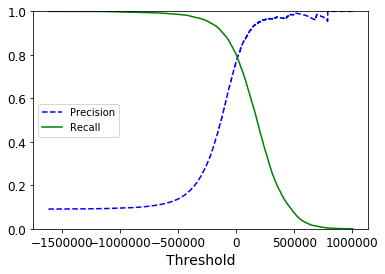

In [21]:
# first, get all instances in the training set, but have it return decision_scores intead of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

# Now, compute the precision and recall for all possible thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Now graph using matplotlib
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Alternatively, you could directly plot precision vs recall

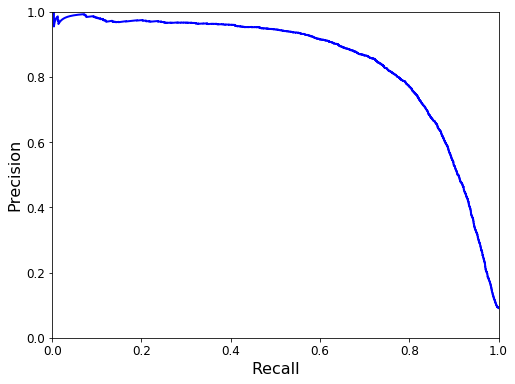

In [22]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [23]:
# Precision really takes a nosedive around 80% recall, so we'd probably want something like 60% recall.
# Let's aim for 90% precision though. Using the first plot, we'd need something around 70000 for our threshold

y_train_pred_90 = (y_scores > 70000)

precision_score(y_train_5, y_train_pred_90)

0.8659205116491548

In [24]:
recall_score(y_train_5, y_train_pred_90)

0.6993174691016417

In [25]:
# Just remember, the more your precision, the less your recall

## ROC Curves

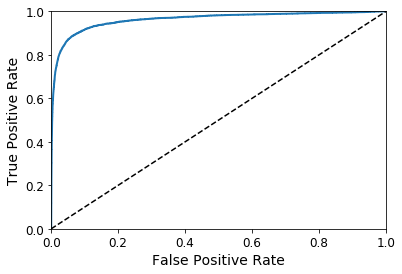

0.9624496555967155

In [26]:
# ROC stands for Reciver Operating Characteristic. It's similar to precision vs recall, but it plots the
# true positive rate (recall) against the false positive rate. FPR is the ratio of negative instances that are 
# incorrectly classified as positive and it is equal to 1 - the true negative rate (TNR, or specificity).
# The TNR is the number of negative instances that are correctly classified as negative.

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr, tpr)
plt.show()

# The dotted line represent a random classifier. The further towards the top-left our curve is, the better
# ROC curves are usually compared by the area under the curve (AUC).

# In general, use the Precision vs Recall graph if the positive class is rare or if you care more about
# false positives than false negatives. Use the ROC curve otherwise

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


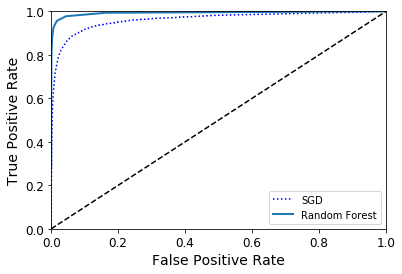

In [27]:
# Next up: RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

# For an ROC curve we need scores instead of probabilities. WE can use the positive class' probability as the score

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# Let's plot the roc curve
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

# The RandomForestClassifier has a better ROC curve than SGDClassifier's curve. We can check the AUC score as well

In [28]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [29]:
# Let's check the precision and recall scores too
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [30]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

# Multiclass Classification

As the name suggests, these can distinguish between more than two classifiers at a time
Some algos (like RandomForest or naïve Bays) are capable of handling multiple classes directly.
Others like SVM or Linear classifiers are strictly binary classifiers. With that said, there are ways to use
binary classifiers as multiclass using multiple binary classifiers.

To classify images into 10 digits from 0 to 9 is to train 10 classifiers (one per digit). Then, when you want to
classify an image, you get the decision score from each classifier for that image and you select the class whose
cclassifier has the highest score. This is called a *one-versus-all* strategy (OvA)

Another strategy is to train a binary classifier for every pair of digits: one to get 0s and 1s, another for 0s and 2s, and so on. This is called a *one-versus-one* strategy (OvO). If there are *N* classes, you need *N* x *(N - 1) /2* classifiers. For the MNIST problem, this would be 45 classifiers. To classify an image, you'd run the image through all 45 classifiers and see which class wins the most duels. The main advantage is that each classifier only needs to be trained on the subsection of training data that it must distinguish.

Some algos (like SVM) scale poorly with the size of the training set, so for those, OvO is preferable since it is faster to train many classifiers on small training sets compared to a few classifiers on large training sets. For most binary algos though, OvA is preferable.

SK-Learn can detect when you try to use binary classification for multiclass classification and will run OvA (or OvO for SVMs) automatically. Here's an example

In [31]:
sgd_clf.fit(X_train, y_train) # using all of the data
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

In [32]:
# Let's check to see how many classifiers were trained
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

# as we can see, the highest score does correspond to the number 5

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [33]:
np.argmax(some_digit_scores)

5

In [34]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [35]:
sgd_clf.classes_[5]

5.0

In [36]:
# We can force SKLearn to use one-vs-one or one-vs-all. Here's an example

from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/s

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/s

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/s

array([5.])

In [37]:
len(ovo_clf.estimators_)

45

In [38]:
# Using RandomForest is just as easy

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

# We didn't need OvA or OvO since RandomForest can classify into multiple classes directly

array([5.])

In [39]:
forest_clf.predict_proba([some_digit]) # This will get a list of probabilities for each instance of each class

# The 0.8 at 5 means the model estimates an 80% probability that the image is a 5. It also kind of thinks that it
# could be a 0 or a 3 with a 10% chance of each.

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [40]:
# As usual, let's evaluate

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/s

array([0.84063187, 0.84899245, 0.86652998])

In [41]:
# Over 84% on all test folds. Not bad, but we can do better. Let's scale the input (see the chapter 2 notebook)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/s

array([0.91011798, 0.90874544, 0.906636  ])

In [42]:
# If this were a real project, we would do the steps of an end-to-end project of data prep options, trying multiple
# models, shortlisting the best ones and finetuning their hyperparams using GridSearchCV and using pipelines to
# automate the process as much as possible. We'll assume here that those steps have been completed already though.

# Let's do error analysis by looking at the confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.7/site-packages/s

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

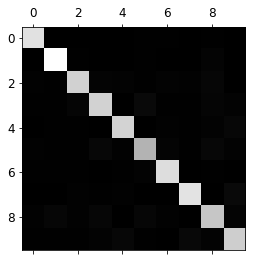

In [43]:
# That's a lot of numbers... let's use Matplotlib for visualization
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# Looks like most of the images are on the main diagonal (were classified correctly).
# The 5s look a bit dark, so that could mean that there are fewer 5s in the dataset or that the classifier doesn't
# work very well on 5s (we can verify that both of those are true)

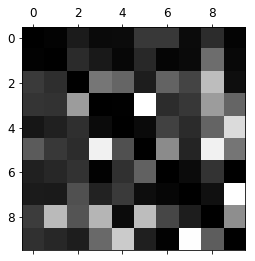

In [44]:
# let's focus the plot on the errors. First: divid each value by the number of images in the corresponding class
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Now let's fill the diagonal with 0s to only keep the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [45]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

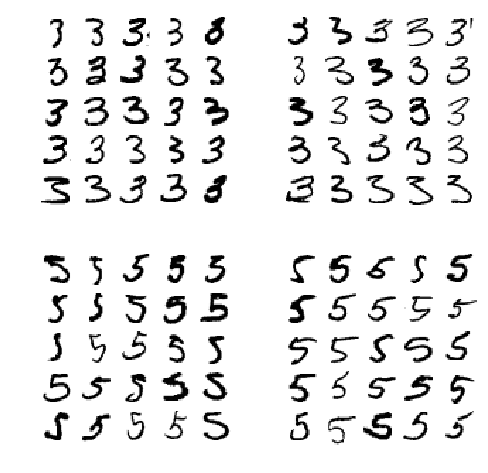

In [46]:
# Remember that rows = actual classes and columns = predicted classes
# The cols for 8 and 9 are very bright, so many images get misclassified as such.
# Similarly, the ros for 8 and 9 are quite bright as well so that means that 8 and 9 are also confused with a lot of
# other digits.

# Let's look at individual errors to gain more insight

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# The blocks on the left show digits classified as 3s and the blocks on the right show digits classified as 5s
# the bottom left and top right blocks are blocks that humans even will struggle with classifying (row 8 col 1)
# For the rest, we're using a linear model of a simple SGDClassifier, so since it simply assigns a weight to each
# pixel and sums them to get a score for the class, and since 3 and 5 only differ by a few pixels, the model will
# easily confuse them

# Multilabel Classification

Until now, each instance has always been assigned to just one class. But what if we want to do face recognition; we'd have to handle the case of it recognizing more than one face in a photo. This kind of system that outputs multiple binary labels is called a *multilabel classification system*.

In [47]:
# we're not doing faces (yet), but here's a simpler example
from sklearn.neighbors import KNeighborsClassifier

# Create multilabel array of two target labels
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

# Train K Nearest Neighbors algo
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

# Give it a test
knn_clf.predict([some_digit]) # should be less than 7 (false) and odd (true)

array([[False,  True]])

In [ ]:
# There are a lot of ways to evaluate a multilabel classifier, and selecting the correct metric depends on the project
# One approach is to measure the F1 score for each individual label (or any other metric discussed earlier), then to
# compute the average score

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

# WARNING: Depending on your hardware, this cell can take a LONG time to run!
# This code assumes that all labels are equally important. If that isn't true, set average to 'weighted' in the
# previous code line

# Multioutput Classification

In [48]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

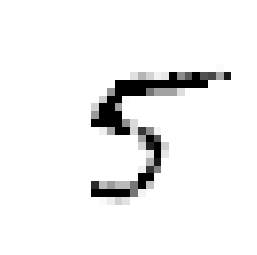

In [49]:
# Lastly, we'll tackle multioutput-multiclass classification (aka multioutput classification).
# It's a generalization of multilabel classification where each label can be multiclass.

# To illustrate, we'll make a system that removes noise from images

# note: this is kind of a regression task, and multioutput is not limited to classification tasks.

# First, create the training and test sets by taking the MNIST images and adding noise to their pixel intensities
# using numpy's randint() function.

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

# let's use a k nearest neighbors classifier to train and clean the image
knn_clf.fit(X_train_mod, y_train_mod)
some_index = 5500
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

# Not bad!

# Exercises

## 1) MNIST classifier with over 97% accuracy on Test Set

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}] # params to tune

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=2)


In [51]:
grid_search.fit(X_train, y_train)
# This cell will also take a while... approximately 4.5 hours in total

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................


KeyboardInterrupt: 

In [ ]:
print(grid_search.best_params_, "\n", grid_search.best_score_)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

# 2) Data Augmentation

In [ ]:
from scipy.ndimage.interpolation import shift

def shift_image(img, dx, dy):
    img = img.reshape((28, 28))
    shifted = shift(img, [dy, dx], cval=0, mode='constant')
    return shifted.reshape([-1])

In [ ]:
image = X_train[1000] # Pick a random image out of the bunch
shifted_down = shift_image(image, 0, 5)
shifted_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# shift by 1 pixel in each direction
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for img, lab in zip(X_train, y_train):
        X_train_augmented.append(shift_image(img, dx, dy))
        y_train_augmented.append(lab)

# Add shifted images to the augmented datasets
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
# Shuffle our data
shuffle_ind = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_ind]
y_train_augmented = y_train_augmented[shuffle_ind]

In [ ]:
# Pick our best model (requires step 1)
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
# Train our best model
knn_clf.fit(X_train_augmented, y_train_augmented)

In [ ]:
# Let's check the new accuracy

y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

# 3) The Titanic Dataset

#### Who lives and dies?

In [ ]:
TITANIC_PATH = os.path.join("../datasets", "Titanic")

In [ ]:
import pandas as pd

def load_titanic_data(filename, pathname=TITANIC_PATH):
    csv_path = os.path.join(pathname, filename)
    return pd.read_csv(csv_path)

In [ ]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

# Luckily, the data is already split for us. Step 1 = done
# This data doesn't have labels though. We have to train a model and upload it to Kaggle to see
# just how well (or poorly) we did

In [ ]:
train_data.head() # Let's look at the first bit of the data

The attributes have the following meaning:
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [ ]:
# Next, see how much data is missing (we can see some NaN in the cabin column already)
train_data.info()

# Looks like Age has missing data (occasionally), Cabin has a LOT of missing data, and Embarked has some missing data
# I'll tackle Cabin later, but for Age we can just replace with the median age to fill the na values.
# Ticket and Name may have value, but converting them to numbers may be tricky so we'll ignore them for now

In [ ]:
# Next, I'll look at the numerical data
train_data.describe()

# Oof, only 38% of passengers survived. That's pretty bad...
# This tells us that we should care more about the accuracy for evaluating this model


In [ ]:
# Let's make sure that the target is either lived or died (1 or 0)
train_data['Survived'].value_counts()

Next, the categorical attributes

In [ ]:
train_data['Pclass'].value_counts()

In [ ]:
train_data['Sex'].value_counts()

In [ ]:
train_data['Embarked'].value_counts()

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

In [ ]:
# Time to build data pipelines. This is the same selector from the previous chapter

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [ ]:
# Pipeline for numerical attributes

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ('imputer', Imputer(strategy='median'))
])

In [ ]:
num_pipeline.fit_transform(train_data)

We'll need a custom Imputer for the string data

In [ ]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                      index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [ ]:
# We'll use a OneHotEncoder for the categorical values. Have to import it from local though until version 0.20 comes
# out

from future_encoders import OneHotEncoder

Now we'll build the pipeline for categorical attributes

In [ ]:
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(['Pclass', "Sex", "Embarked"])),
    ('imputer', MostFrequentImputer()),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [ ]:
cat_pipeline.fit_transform(train_data)

In [ ]:
# Now to join both the pipelines together
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [ ]:
# Time to make our processed training data

X_train = preprocess_pipeline.fit_transform(train_data)
X_train

In [ ]:
# Add labels
y_train = train_data['Survived']

We're ready to train classifiers. We'll start with a `SVC`

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

In [ ]:
# Model is trained, let's evaluate

X_test = preprocess_pipeline.fit_transform(test_data)
y_pred = svm_clf.predict(X_test)

At this point, we can make a `.csv` of our results, upload them to Kaggle, and hope to see how well we did.

....ooorrrr we could cross-validate and find out ourselves

In [ ]:
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

# 73% is not awful, but just a bit better than randomly guessing (which would be around 50%).
# Time to try a different model. Maybe RandomForest will do better?

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

# Better! We'll try a few more, then we'll move on to tuning hyperparams

In [ ]:
# Next up, linear classification
sgd_clf = SGDClassifier(random_state=42)
sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=10)
sgd_scores.mean()

# Worse than the other two. Let's stick with and tune the RandomForest one

In [ ]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,8,16]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 15], 'max_features': [3,4,5]}
]

grid_search = GridSearchCV(forest_clf, param_grid, cv=4, verbose=3, n_jobs=-1)